# Exploratory Data Analysis

### Setting up the Environment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from textstat import textstat

## Distribution of Seniority Levels


In [2]:
# Distribution of Seniority Levels
plt.figure(figsize=(8, 6))
df['seniority_level'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Seniority Level')
plt.ylabel('Count')
plt.title('Distribution of Seniority Levels')
plt.show()


NameError: name 'df' is not defined

<Figure size 800x600 with 0 Axes>

### Loading and Inspecting the Dataset
Load the cleaned dataset and inspect its structure:

In [ ]:
# Load the cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')

# Display the first few rows of the dataset
print(df.head())

# Summary information about the dataset
print(df.info())


   Unnamed: 0             Job Title  \
0           0     Flutter Developer   
1           1      Django Developer   
2           2      Machine Learning   
3           3         iOS Developer   
4           4  Full Stack Developer   

                                     Job Description  \
0  We are looking for hire experts flutter develo...   
1  PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ ...   
2  Data Scientist (Contractor)\n\nBangalore, IN\n...   
3  JOB DESCRIPTION:\n\nStrong framework outside o...   
4  job responsibility full stack engineer – react...   

                                 cleaned_description  communal_score  \
0  looking hire experts flutter developer eligibl...               0   
1  job code pdj strong python experience api deve...               0   
2  data scientist contractor bangalore responsibi...               2   
3  job description strong framework outside ios a...               2   
4  job responsibility full stack engineer react r...               4

### Basic Statistical Summary
Calculate basic statistics for numerical attributes:

In [ ]:
# Basic statistics
basic_stats = df.describe()
print(basic_stats)

        Unnamed: 0  communal_score  agentic_score  communal_freq  \
count  2277.000000     2277.000000    2277.000000    2277.000000   
mean   1187.974089        1.370224       0.737813       0.007836   
std     694.438444        1.835131       1.195053       0.011481   
min       0.000000        0.000000       0.000000       0.000000   
25%     585.000000        0.000000       0.000000       0.000000   
50%    1183.000000        1.000000       0.000000       0.004098   
75%    1782.000000        2.000000       1.000000       0.010638   
max    2403.000000       15.000000       9.000000       0.107143   

       agentic_freq   word_count   char_count  avg_word_length  \
count   2277.000000  2277.000000  2277.000000      2277.000000   
mean       0.003259   186.561704  1536.522178         7.151381   
std        0.005168   133.593504  1120.082956         0.456440   
min        0.000000     9.000000    62.000000         5.105263   
25%        0.000000    86.000000   695.000000         6.8

### Distribution of Communal and Agentic Scores
Visualize the distribution of communal and agentic scores:

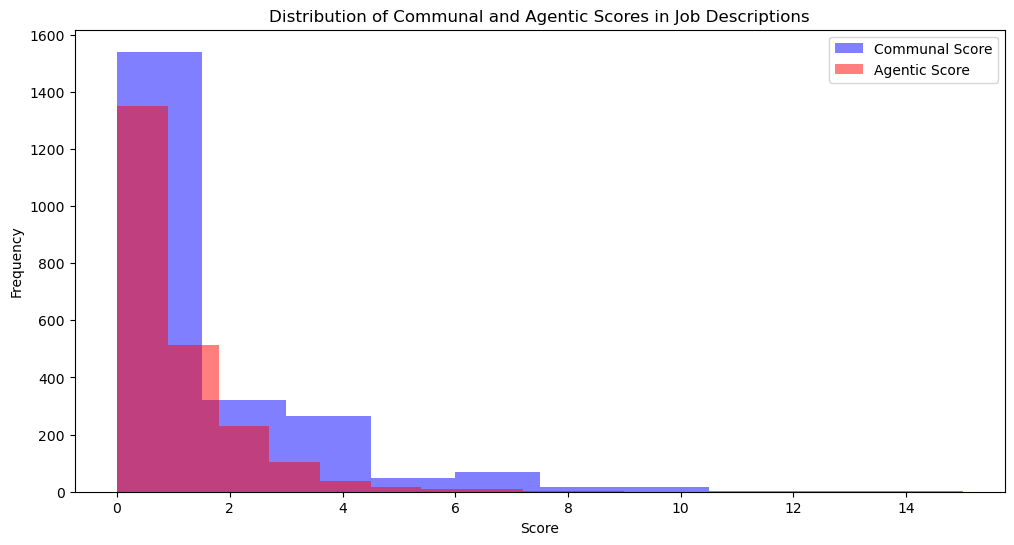

In [ ]:
# Distribution of Communal and Agentic Scores
plt.figure(figsize=(12, 6))
df['communal_score'].plot(kind='hist', alpha=0.5, label='Communal Score', color='blue')
df['agentic_score'].plot(kind='hist', alpha=0.5, label='Agentic Score', color='red')
plt.legend()
plt.xlabel('Score')
plt.title('Distribution of Communal and Agentic Scores in Job Descriptions')
plt.show()


### Word Frequency Analysis
Generate word clouds for communal and agentic words:

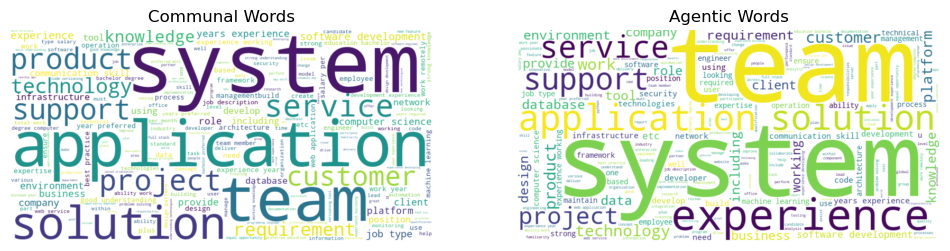

In [ ]:
# Word Frequency Analysis (Word Clouds)
communal_words = ' '.join(df[df['communal_score'] > 0]['cleaned_description'])
agentic_words = ' '.join(df[df['agentic_score'] > 0]['cleaned_description'])

# Generate word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
wordcloud_comm = WordCloud(width=800, height=400, background_color='white').generate(communal_words)
plt.imshow(wordcloud_comm, interpolation='bilinear')
plt.title('Communal Words')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_agentic = WordCloud(width=800, height=400, background_color='white').generate(agentic_words)
plt.imshow(wordcloud_agentic, interpolation='bilinear')
plt.title('Agentic Words')
plt.axis('off')

plt.show()


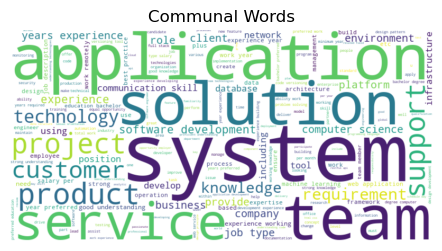

In [ ]:
# Word Frequency Analysis (Word Clouds)
communal_words = ' '.join(df[df['communal_score'] > 0]['cleaned_description'])

# Generate word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
wordcloud_comm = WordCloud(width=800, height=400, background_color='white').generate(communal_words)
plt.imshow(wordcloud_comm, interpolation='bilinear')
plt.title('Communal Words')
plt.axis('off')

plt.show()

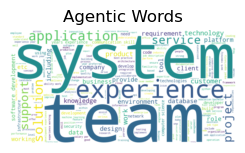

In [ ]:
# Word Frequency Analysis (Word Clouds)
agentic_words = ' '.join(df[df['agentic_score'] > 0]['cleaned_description'])

# Generate word clouds
plt.subplot(1, 2, 2)
wordcloud_agentic = WordCloud(width=800, height=400, background_color='white').generate(agentic_words)
plt.imshow(wordcloud_agentic, interpolation='bilinear')
plt.title('Agentic Words')
plt.axis('off')

plt.show()

### Sentiment Analysis
Analyze and visualize sentiment distribution:

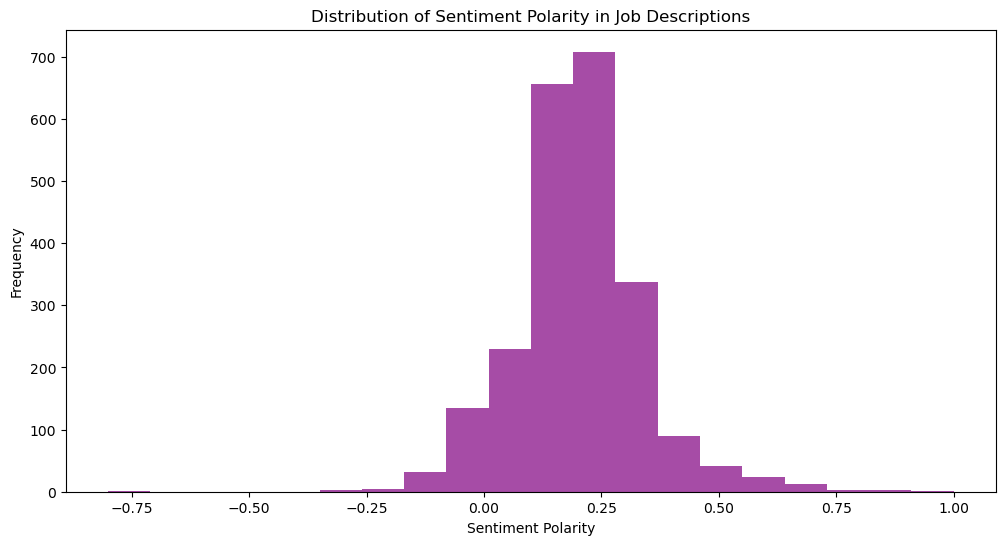

In [ ]:
# Sentiment Analysis
df['sentiment'] = df['cleaned_description'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(12, 6))
df['sentiment'].plot(kind='hist', bins=20, alpha=0.7, color='purple')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarity in Job Descriptions')
plt.show()

Sentiment analysis calculates the sentiment polarity of each job description text. Sentiment polarity typically ranges from -1 to +1:
Negative Sentiment: Close to -1 indicates negative sentiment (e.g., unhappy, critical).
Neutral Sentiment: Around 0 indicates neutral sentiment (e.g., factual, objective).
Positive Sentiment: Close to +1 indicates positive sentiment (e.g., happy, satisfied).

The visualization often takes the form of a histogram.
X-axis: Represents the sentiment polarity values ranging from -1 (negative) to +1 (positive).
Y-axis: Represents the frequency or count of job descriptions falling into each sentiment polarity range.
A bell-shaped curve centered around 0 indicates a balanced mix of positive and negative sentiments.
Skewed distributions towards the negative or positive ends suggest prevalent sentiment trends in the dataset.

Sentiment Trends: Analyzing the histogram helps in understanding whether the majority of job descriptions are positively, neutrally, or negatively perceived.

Variability: Variability in sentiment scores indicates diversity in the emotional tone of job descriptions, which may influence candidate perceptions and application decisions.

### Readability Metrics Analysis
Visualize readability metrics distribution:

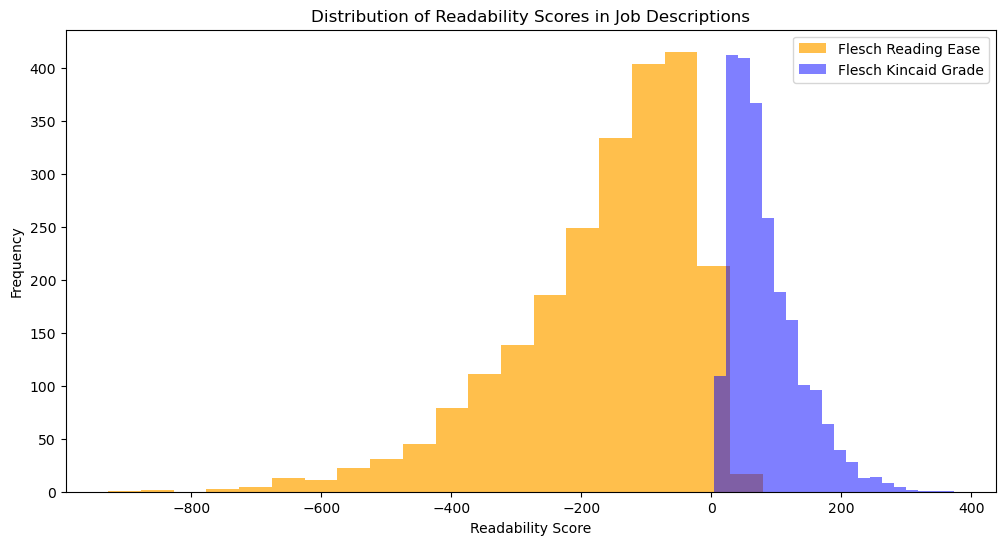

In [ ]:
# Readability Metrics
plt.figure(figsize=(12, 6))
df['flesch_reading_ease'].plot(kind='hist', bins=20, alpha=0.7, color='orange', label='Flesch Reading Ease')
df['flesch_kincaid_grade'].plot(kind='hist', bins=20, alpha=0.5, color='blue', label='Flesch Kincaid Grade')
plt.legend()
plt.xlabel('Readability Score')
plt.ylabel('Frequency')
plt.title('Distribution of Readability Scores in Job Descriptions')
plt.show()


The Flesch Reading Ease and Flesch-Kincaid Grade Level are readability metrics commonly used to assess the complexity and difficulty of written text, including job descriptions. Here's what each metric indicates:

Flesch Reading Ease
The Flesch Reading Ease score is a measure of how easy a piece of text is to read. It is calculated based on the average number of syllables per word and the average number of words per sentence in the text. The formula for calculating the Flesch Reading Ease score is:

206.835
−
1.015
×
(
average words per sentence
)
−
84.6
×
(
average syllables per word
)
206.835−1.015×(average words per sentence)−84.6×(average syllables per word)

The score typically ranges from 0 to 100, where higher scores indicate easier readability:

90-100: Very easy to read. Easily understandable by an average 11-year-old student.
80-89: Easy to read. Understandable by 6th-grade students.
70-79: Fairly easy to read. Understandable by 7th-8th grade students.
60-69: Standard readability. Understandable by 9th-10th grade students.
50-59: Fairly difficult to read. Understandable by high school graduates.
30-49: Difficult to read. Understandable by college graduates.
0-29: Very difficult to read. Best understood by university graduates.
Flesch-Kincaid Grade Level
The Flesch-Kincaid Grade Level is another readability test that assesses the approximate grade level required to understand a piece of text. It calculates the grade level based on the average number of words per sentence and the average number of syllables per word. The formula is:

0.39
×
(
average words per sentence
)
+
11.8
×
(
average syllables per word
)
−
15.59
0.39×(average words per sentence)+11.8×(average syllables per word)−15.59

The result is a score that corresponds to a U.S. grade level. For example, a score of 8.0 indicates that the text is readable by an average eighth grader.

Interpretation
Lower Scores: Indicate more complex and difficult-to-read text.
Higher Scores: Indicate easier and more accessible text.
In the context of job descriptions, these metrics can help gauge how understandable and accessible the language is, which is crucial for attracting a diverse pool of applicants and ensuring clarity in communication.